In [47]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query4 = """
SELECT cast("source 3"."Monthly Period" as integer) as "Period in Months", "source 3"."Experts" as "Number of Experts"
FROM
(SELECT case when "source 2"."Period" >= 0 and "source 2"."Period" <= 30    then '  1'
            when "source 2"."Period" > 30 and "source 2"."Period" <= 60   then ' 2'
            when "source 2"."Period" > 60 and "source 2"."Period" <= 90  then ' 3'
            when "source 2"."Period" > 90 and "source 2"."Period" <= 120   then ' 4'
            when "source 2"."Period" > 120 and "source 2"."Period" <= 150  then ' 5'
            when "source 2"."Period" > 150 and "source 2"."Period" <= 180  then ' 6'
            when "source 2"."Period" > 180 and "source 2"."Period" <= 210    then ' 7'
            when "source 2"."Period" > 210 and "source 2"."Period" <= 240   then ' 8'
            when "source 2"."Period" > 240 and "source 2"."Period" <= 270  then ' 9'
            when "source 2"."Period" > 270 and "source 2"."Period" <= 300   then ' 10'
            when "source 2"."Period" > 300 and "source 2"."Period" <= 330  then ' 11'
            when "source 2"."Period" > 330 and "source 2"."Period" <= 365  then ' 12'
            when "source 2"."Period" > 365 and "source 2"."Period" <= 730  then ' Year 2- Month 12-24'
           else 'Month 24+' end as "Monthly Period", sum("source 2"."Number of Experts")/197 * 100 as "Experts"
FROM 
(SELECT count(*) as "Number of Experts", "source"."Period" FROM
(SELECT 
  cast(selectsystems.created as date) - cast(experts.created as date) as "Period", 
  cast(experts.created as date) as "Experts Registration Date", 
  cast(selectsystems.created as date) as "Experts Job Onboarding Date" 
FROM 
  experts 
  LEFT JOIN selectsystems ON cast(selectsystems.expert as text) = cast(experts.id as text)
  WHERE selectsystems.record_id IS NOT NULL
ORDER BY 
  "Period" ASC) "source"
  GROUP BY "source"."Period") "source 2"
  GROUP BY "Monthly Period"
  ORDER BY "Monthly Period" ASC
  LIMIT 12) "source 3"
  ORDER BY "Period in Months"
  """
dataset4 = sqlio.read_sql_query(query4,conn)
df4 = pd.DataFrame(data=dataset4)
df4.to_csv('analysis4.csv')
print(df4)


    Period in Months  Number of Experts
0                  1          23.857868
1                  2          10.659898
2                  3          10.152284
3                  4          10.659898
4                  5           8.121827
5                  6           5.076142
6                  7           8.121827
7                  8           7.106599
8                  9           5.076142
9                 10           2.030457
10                11           2.030457
11                12           1.522843


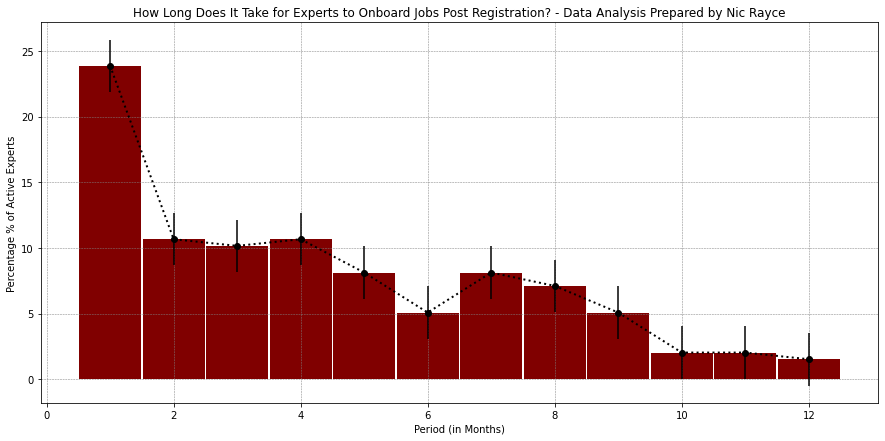

In [57]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query4 = """
SELECT cast("source 3"."Monthly Period" as integer) as "Period in Months", "source 3"."Experts" as "Number of Experts"
FROM
(SELECT case when "source 2"."Period" >= 0 and "source 2"."Period" <= 30    then '  1'
            when "source 2"."Period" > 30 and "source 2"."Period" <= 60   then ' 2'
            when "source 2"."Period" > 60 and "source 2"."Period" <= 90  then ' 3'
            when "source 2"."Period" > 90 and "source 2"."Period" <= 120   then ' 4'
            when "source 2"."Period" > 120 and "source 2"."Period" <= 150  then ' 5'
            when "source 2"."Period" > 150 and "source 2"."Period" <= 180  then ' 6'
            when "source 2"."Period" > 180 and "source 2"."Period" <= 210    then ' 7'
            when "source 2"."Period" > 210 and "source 2"."Period" <= 240   then ' 8'
            when "source 2"."Period" > 240 and "source 2"."Period" <= 270  then ' 9'
            when "source 2"."Period" > 270 and "source 2"."Period" <= 300   then ' 10'
            when "source 2"."Period" > 300 and "source 2"."Period" <= 330  then ' 11'
            when "source 2"."Period" > 330 and "source 2"."Period" <= 365  then ' 12'
            when "source 2"."Period" > 365 and "source 2"."Period" <= 730  then ' Year 2- Month 12-24'
           else 'Month 24+' end as "Monthly Period", sum("source 2"."Number of Experts")/197 * 100 as "Experts"
FROM 
(SELECT count(*) as "Number of Experts", "source"."Period" FROM
(SELECT 
  cast(selectsystems.created as date) - cast(experts.created as date) as "Period", 
  cast(experts.created as date) as "Experts Registration Date", 
  cast(selectsystems.created as date) as "Experts Job Onboarding Date" 
FROM 
  experts 
  LEFT JOIN selectsystems ON cast(selectsystems.expert as text) = cast(experts.id as text)
  WHERE selectsystems.record_id IS NOT NULL
ORDER BY 
  "Period" ASC) "source"
  GROUP BY "source"."Period") "source 2"
  GROUP BY "Monthly Period"
  ORDER BY "Monthly Period" ASC
  LIMIT 12) "source 3"
  ORDER BY "Period in Months"
  """
dataset4 = sqlio.read_sql_query(query4,conn)
df4 = pd.DataFrame(data=dataset4)
    
# Define Data
xdata=df4['Period in Months']
ydata=df4['Number of Experts']
y_error=2
    
# Plot
plt.figure(figsize=(15, 7))
plt.bar(xdata,ydata, yerr = y_error, color ='maroon',width = 0.98)
plt.plot(xdata, ydata, 'o', linestyle = 'dotted', color ='black', linewidth=2)
plt.title("How Long Does It Take for Experts to Onboard Jobs Post Registration? - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Period (in Months)')
plt.ylabel('Percentage % of Active Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.show()
